In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [63]:
df = pd.read_excel('ph.xlsx')
df

,시군구,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,총인구수,기초생활수급자,안전상비의약품,자동차,10만면당 자동차수
0,목포시,17.3,18.403979,1.528970,58.646693,117.755171,216551,3311,255,102292,47236.909550
1,여수시,29.3,20.934653,0.742100,49.157764,73.918711,274626,2038,203,143418,52223.023312
2,순천시,17.8,16.826932,0.546513,47.273704,72.343092,279225,1526,202,153944,55132.599158
3,나주시,16.8,23.296470,0.679426,50.935398,96.690926,115833,787,112,75025,64769.970561
4,광양시,25.3,14.324758,0.775685,35.648506,38.949293,151479,1175,59,93385,61648.809406
5,담양군,10.7,32.426017,0.518259,50.083836,124.120811,45923,238,57,31480,68549.528559
6,곡성군,8.3,37.925839,0.514498,58.799750,180.074235,27211,140,49,18243,67042.740068
7,구례군,7.1,36.338436,0.626733,44.192680,148.648106,24891,156,37,16530,66409.545619
8,고흥군,6.3,42.827717,0.560008,53.104181,49.885746,62142,348,31,38856,62527.759004
9,보성군,7.0,40.589750,0.731393,74.684522,77.259851,38830,284,30,26600,68503.734226


In [86]:
df = df[['재정자립도','노인인구비율','기초생활수급자비율','10만명당 약국수','10만명당 안전상비의약품점포수','10만면당 자동차수']]

In [87]:
corr = df.corr()

In [88]:
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [89]:
from matplotlib import font_manager, rc

import matplotlib

font_location='c:/Windows/fonts/malgun.ttf'

font_name=font_manager.FontProperties(fname=font_location).get_name()

matplotlib.rc('font',family=font_name)

In [90]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\Kang\AppData\Local\Temp/ipykernel_25968/519181320.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


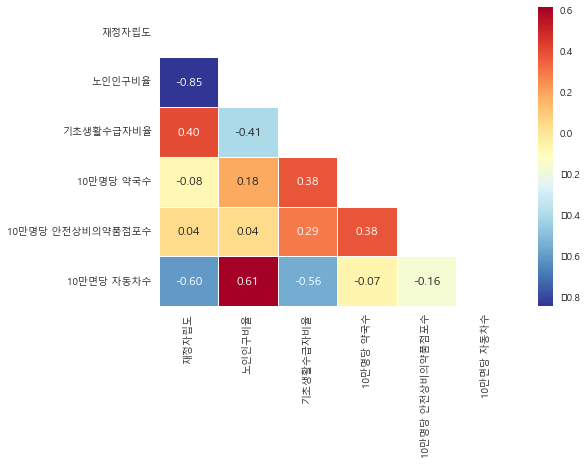

In [91]:
sns.heatmap(data=corr, 
           annot = True,
           mask=mask,
           fmt='.2f',
           linewidths=1,
           cmap='RdYlBu_r')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [94]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['재정자립도','노인인구비율','기초생활수급자비율','10만명당 약국수','10만명당 안전상비의약품점포수','10만면당 자동차수']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [95]:
data_scale

array([[0.47826087, 0.1431157 , 1.        , 0.68546546, 0.62663097,
        0.        ],
       [1.        , 0.23190206, 0.35272406, 0.4993682 , 0.36399582,
        0.18264667],
       [0.5       , 0.08778646, 0.19183459, 0.46241795, 0.3545559 ,
        0.28922754],
       [0.45652174, 0.31476423, 0.30116889, 0.53423124, 0.50042983,
        0.64225474],
       [0.82608696, 0.        , 0.38035087, 0.2344241 , 0.15448533,
        0.52792328],
       [0.19130435, 0.63506597, 0.1685931 , 0.51753037, 0.6647691 ,
        0.78070399],
       [0.08695652, 0.82802213, 0.16549931, 0.68846722, 1.        ,
        0.72550872],
       [0.03478261, 0.77232955, 0.25782314, 0.40199279, 0.81171824,
        0.70231413],
       [0.        , 1.        , 0.20293557, 0.57676549, 0.22000834,
        0.56012014],
       [0.03043478, 0.921483  , 0.3439166 , 1.        , 0.38401342,
        0.77902649],
       [0.33043478, 0.48214031, 0.48337673, 0.54494549, 0.20065392,
        0.40383172],
       [0.03043478, 0

In [96]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\AppData\Local\Temp/ipykernel_25968/852914301.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = model.fit_predict(data_scale)


C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

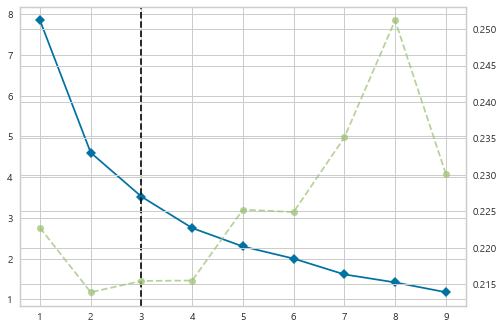

In [97]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(data_scale)

In [1]:
import pandas as pd

In [16]:
df = {'cluster':['재정자립도','고령인구 비율', '10만 명당 약국 수','10만 명당 자동차 수'],
      0:[1.173018, -1.285672, -0.091799, -1.091774],
      1:[-0.550149, 0.503139, -0.526289, 0.557231],
      2:[-0.541929, 0.793662, 1.181096, 0.414022]}

In [17]:
df

{'cluster': ['재정자립도', '고령인구 비율', '10만 명당 약국 수', '10만 명당 자동차 수'],
 0: [1.173018, -1.285672, -0.091799, -1.091774],
 1: [-0.550149, 0.503139, -0.526289, 0.557231],
 2: [-0.541929, 0.793662, 1.181096, 0.414022]}

In [18]:
a = pd.DataFrame(df)

In [19]:
a

,cluster,0,1,2
0,재정자립도,1.173018,-0.550149,-0.541929
1,고령인구 비율,-1.285672,0.503139,0.793662
2,10만 명당 약국 수,-0.091799,-0.526289,1.181096
3,10만 명당 자동차 수,-1.091774,0.557231,0.414022


In [20]:
a = a.set_index('cluster')

In [21]:
a

,0,1,2
cluster,,,
재정자립도,1.173018,-0.550149,-0.541929
고령인구 비율,-1.285672,0.503139,0.793662
10만 명당 약국 수,-0.091799,-0.526289,1.181096
10만 명당 자동차 수,-1.091774,0.557231,0.414022


In [22]:
a.columns

Index([0, 1, 2], dtype='object')

In [23]:
a.reset_index

<bound method DataFrame.reset_index of                      0         1         2
cluster                                   
재정자립도         1.173018 -0.550149 -0.541929
고령인구 비율      -1.285672  0.503139  0.793662
10만 명당 약국 수  -0.091799 -0.526289  1.181096
10만 명당 자동차 수 -1.091774  0.557231  0.414022>

In [25]:
a.reset_index(drop=True)

,0,1,2
0,1.173018,-0.550149,-0.541929
1,-1.285672,0.503139,0.793662
2,-0.091799,-0.526289,1.181096
3,-1.091774,0.557231,0.414022


In [26]:
a

,0,1,2
cluster,,,
재정자립도,1.173018,-0.550149,-0.541929
고령인구 비율,-1.285672,0.503139,0.793662
10만 명당 약국 수,-0.091799,-0.526289,1.181096
10만 명당 자동차 수,-1.091774,0.557231,0.414022


In [27]:
df = pd.read_csv('a.csv')
df

,cluster,0,1,2
0,재정자립도,1.173018,-0.550149,-0.541929
1,고령인구 비율,-1.285672,0.503139,0.793662
2,10만 명당 약국 수,-0.091799,-0.526289,1.181096
3,10만 명당 자동차 수,-1.091774,0.557231,0.414022
